# Quick Investigation on Data

In [40]:
#Import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
#Read data
data_set = pd.read_csv("data/Challenger_Ranked_Games.csv")
data_set.head()

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4247263043,1323,0,1,0,0,0,0,0,0,...,68,73016,49832,533,64,12.8,138,8,38711,60463
1,4247155821,1317,1,0,0,0,1,0,2,0,...,8,44218,37136,571,59,11.8,134,3,24829,14105
2,4243963257,932,0,0,0,0,0,0,0,0,...,20,30797,35364,400,50,10.0,89,5,12589,45201
3,4241678498,2098,0,0,0,1,1,0,1,1,...,72,125866,70528,832,84,16.8,205,9,65312,88202
4,4241538868,2344,1,1,1,1,1,1,2,2,...,83,131536,74596,794,85,17.0,227,7,86431,64141


In [42]:
#About Data
data_set.describe()
data_set.info()
data_set.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26904 entries, 0 to 26903
Data columns (total 50 columns):
gameId                     26904 non-null int64
gameDuraton                26904 non-null int64
blueWins                   26904 non-null int64
blueFirstBlood             26904 non-null int64
blueFirstTower             26904 non-null int64
blueFirstBaron             26904 non-null int64
blueFirstDragon            26904 non-null int64
blueFirstInhibitor         26904 non-null int64
blueDragonKills            26904 non-null int64
blueBaronKills             26904 non-null int64
blueTowerKills             26904 non-null int64
blueInhibitorKills         26904 non-null int64
blueWardPlaced             26904 non-null int64
blueWardkills              26904 non-null int64
blueKills                  26904 non-null int64
blueDeath                  26904 non-null int64
blueAssist                 26904 non-null int64
blueChampionDamageDealt    26904 non-null int64
blueTotalGold              

(26904, 50)

#  Co-relation Matrix

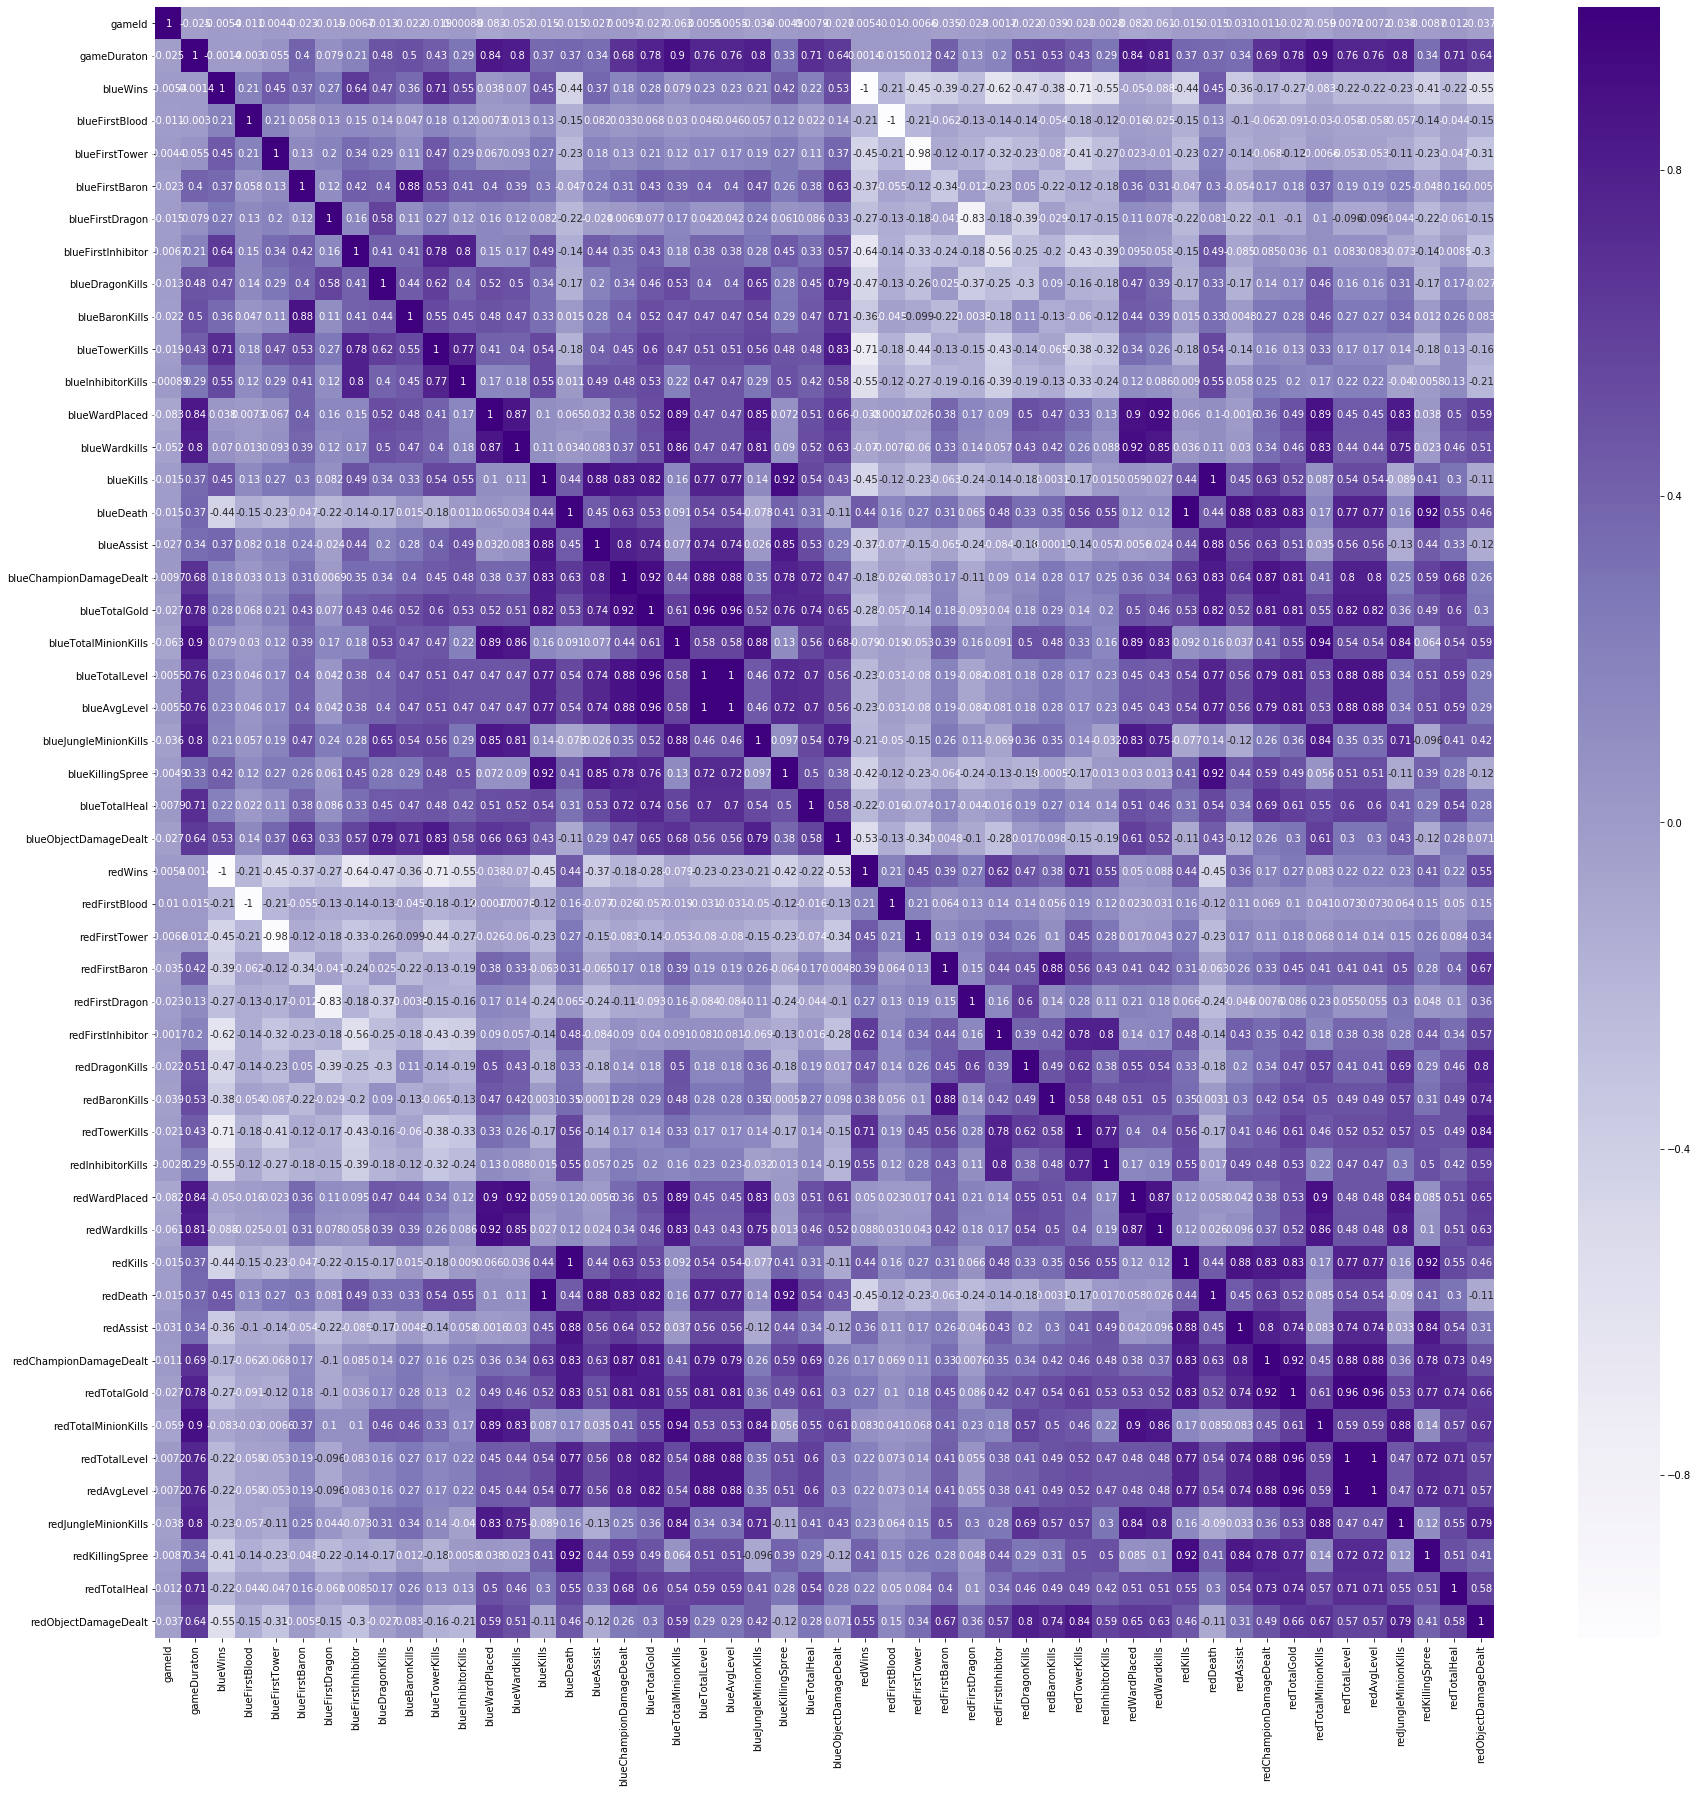

In [43]:
#Represented with heatmap:
plt.figure(figsize = (30,30))
sns.heatmap(data_set.corr(),annot = True,cmap = plt.cm.Purples)
plt.show()

### Necessary modifications on the main data
We delete columns that affects negatively our data + deleting unnecessary columns

### Removed because of being unrelated:
- gameId
- gameDuraton

### Removed because of information is derivable from other team:
- redFirstBlood
- redFirstTower
- redFirstDragon
- redFirstInhibitor

### Combined because of their difference makes much more sense:
Game winner is mostly related with making gaps and being advantegous team

- DragonKills
- BaronKills
- InhibitorKills
- WardPlaced
- WardKills
- Assist
- ChampionDamageDealt
- JungleMinionKills
- TotalHeal

### Needs to be deleted because they are really co-related with win condition:

- TotalGold, TotalMinionKills, TotalTowerKills, TotalLevel
- AvgLevel
- Kills
- Death
- ObjectDamageDealt

According to investigation we did on original data, 

Winning and losing, both seek to secure objectives.
Differences in dragon,baron,tower, and inhibitors are greater than the differences in gold/creep score (CS)/wards placed/wards destroyed
Overall, the differences in macro management is greater than the differences in micro management

Dataset will benefit from a transformation to move closer to a normal distribution.
That's why we dropped some of these macros and kept more micros.

In [44]:
data_set = data_set.drop(['gameId','gameDuraton', 'redWins','redFirstBlood','redFirstTower','redFirstBaron','redFirstDragon','redFirstInhibitor'],axis = 1)
data_set['blueDragonKills']=data_set['blueDragonKills']-data_set['redDragonKills']
data_set['blueBaronKills']=data_set['blueBaronKills']-data_set['redBaronKills']
data_set['blueTowerKills']=data_set['blueTowerKills']-data_set['redTowerKills']
data_set['blueInhibitorKills']=data_set['blueInhibitorKills']-data_set['redInhibitorKills']
data_set['blueWardPlaced']=data_set['blueWardPlaced']-data_set['redWardPlaced']
data_set['blueWardkills']=data_set['blueWardkills']-data_set['redWardkills']
data_set['blueKills']=data_set['blueKills']-data_set['redKills']
data_set['blueDeath']=data_set['blueDeath']-data_set['redDeath']
data_set['blueAssist']=data_set['blueAssist']-data_set['redAssist']
data_set['blueChampionDamageDealt']=data_set['blueChampionDamageDealt']-data_set['redChampionDamageDealt']
data_set['blueTotalGold']=data_set['blueTotalGold']-data_set['redTotalGold']
data_set['blueTotalMinionKills']=data_set['blueTotalMinionKills']-data_set['redTotalMinionKills']
data_set['blueTotalLevel']=data_set['blueTotalLevel']-data_set['redTotalLevel']
data_set['blueJungleMinionKills']=data_set['blueJungleMinionKills']-data_set['redJungleMinionKills']
data_set['blueObjectDamageDealt']=data_set['blueObjectDamageDealt']-data_set['redObjectDamageDealt']
data_set['blueTotalHeal']=data_set['blueTotalHeal']-data_set['redTotalHeal']
data_set = data_set.drop(['redDragonKills','redBaronKills','redTowerKills','redInhibitorKills','redWardPlaced','redWardkills','redKills','redDeath','redAssist','redChampionDamageDealt','redTotalGold','redTotalMinionKills'],axis = 1)
data_set = data_set.drop(['redTotalLevel','redJungleMinionKills','redObjectDamageDealt','redTotalHeal','redKillingSpree','redAvgLevel'],axis=1)

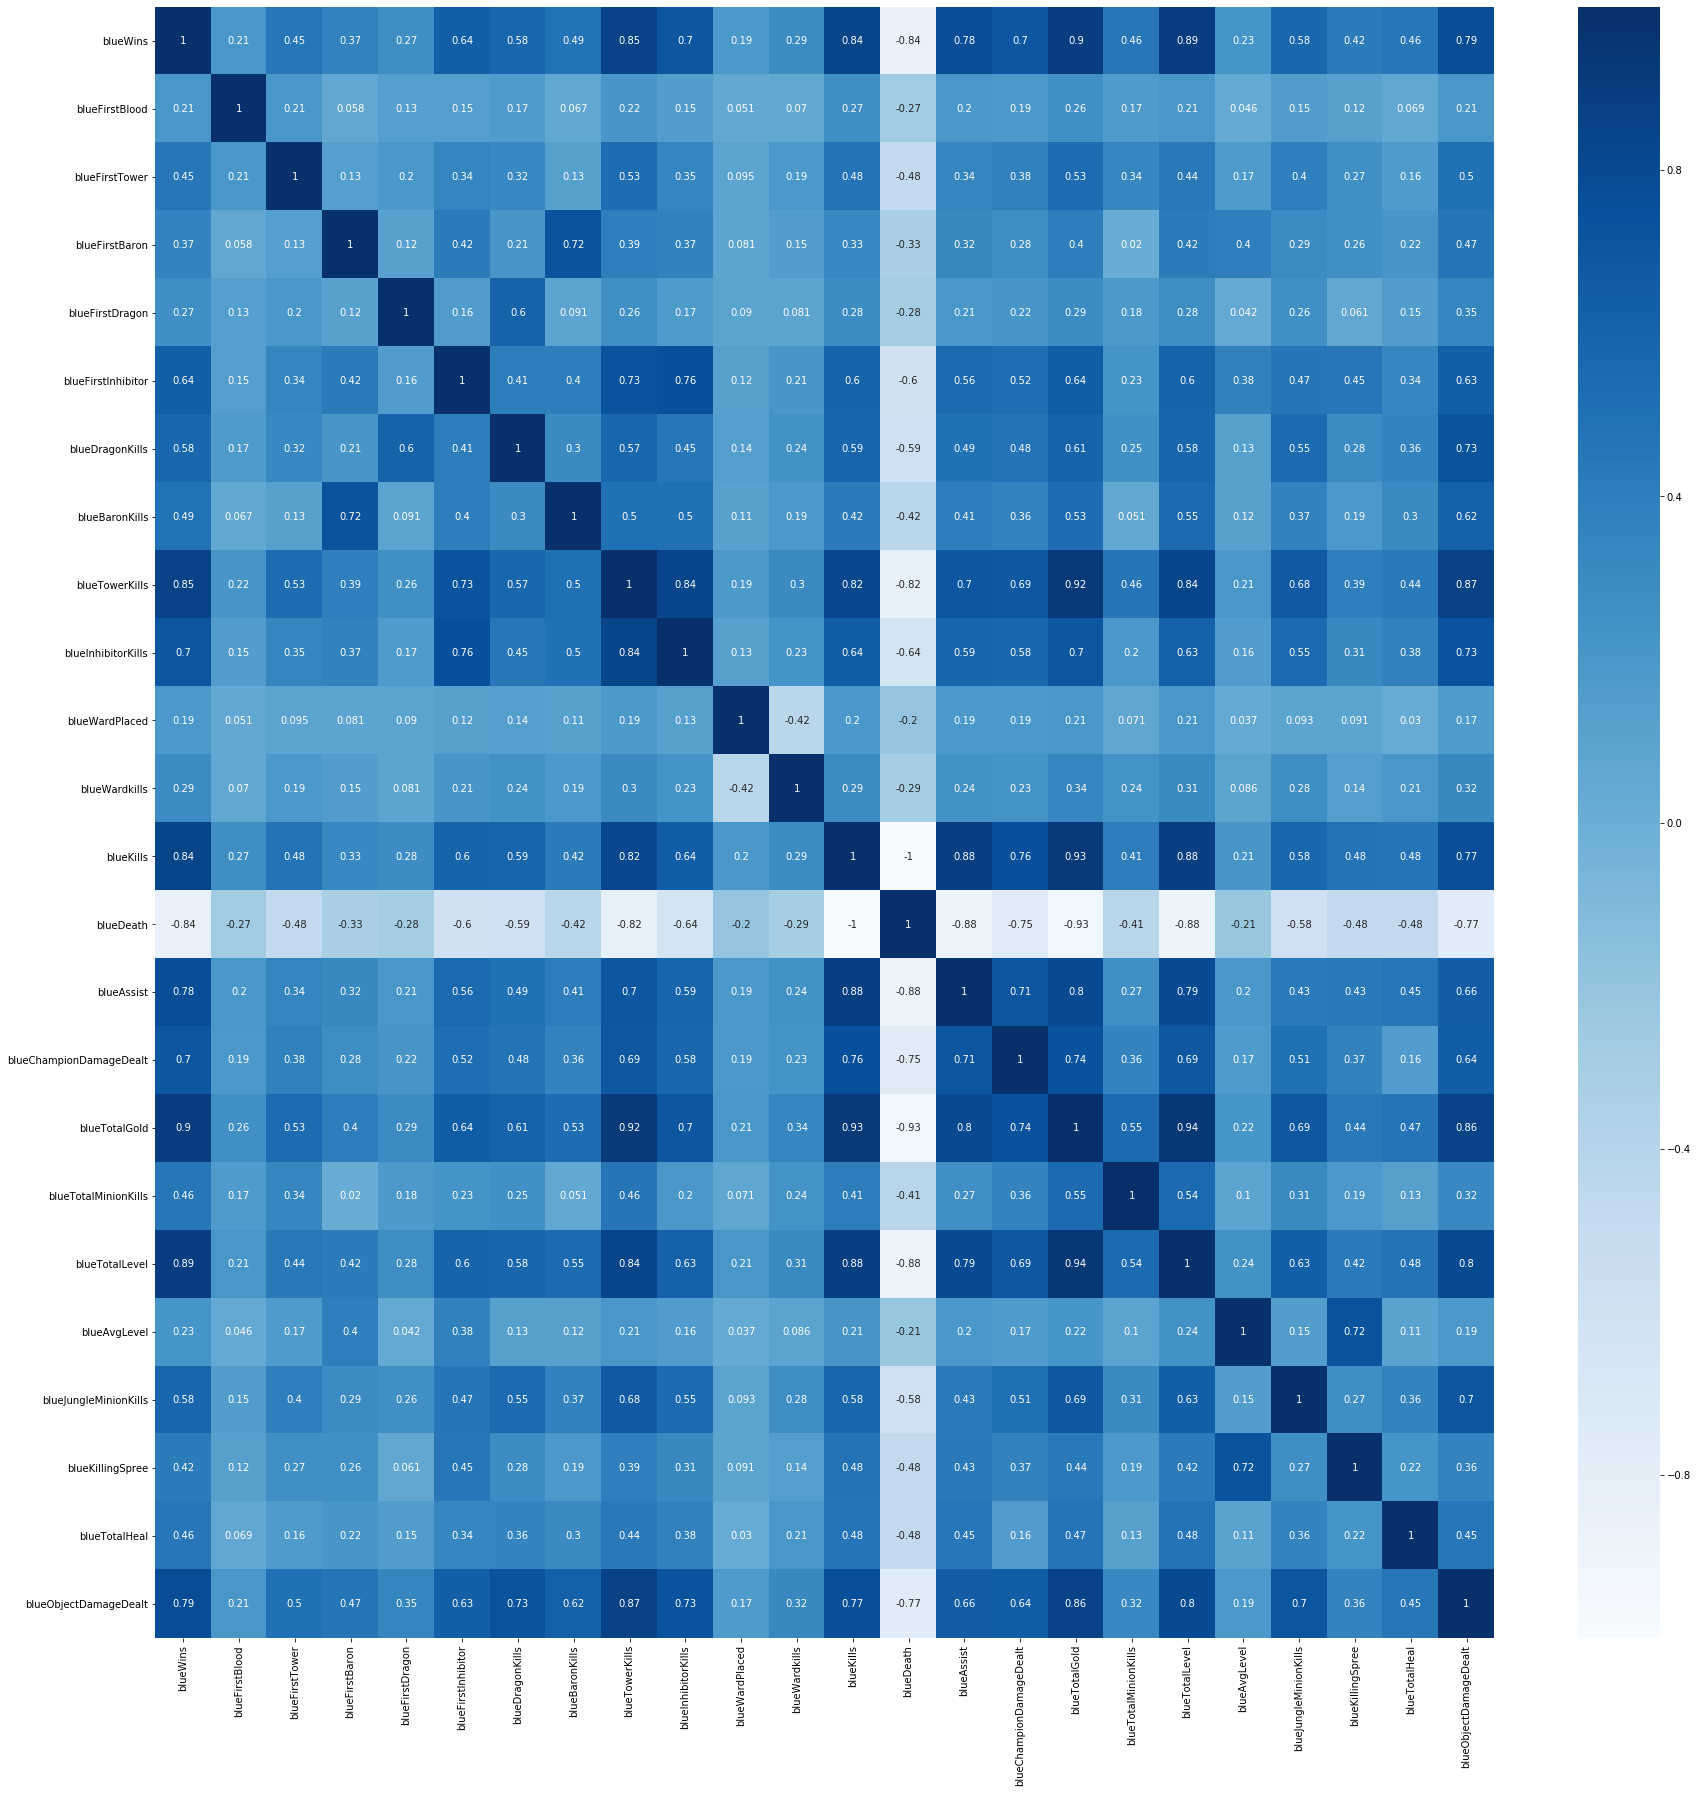

In [45]:
#Co-relation matrix revisited
plt.figure(figsize = (30,30))
sns.heatmap(data_set.corr(),annot = True,cmap = plt.cm.Blues)
plt.savefig('co1.png')
plt.show()

In [46]:
#From this co-relation matrix we wanted to get rid of very informative columns
data_set = data_set.drop(['blueAvgLevel','blueTotalGold','blueTowerKills','blueTotalLevel','blueKills','blueKillingSpree','blueObjectDamageDealt','blueDeath'],axis=1)

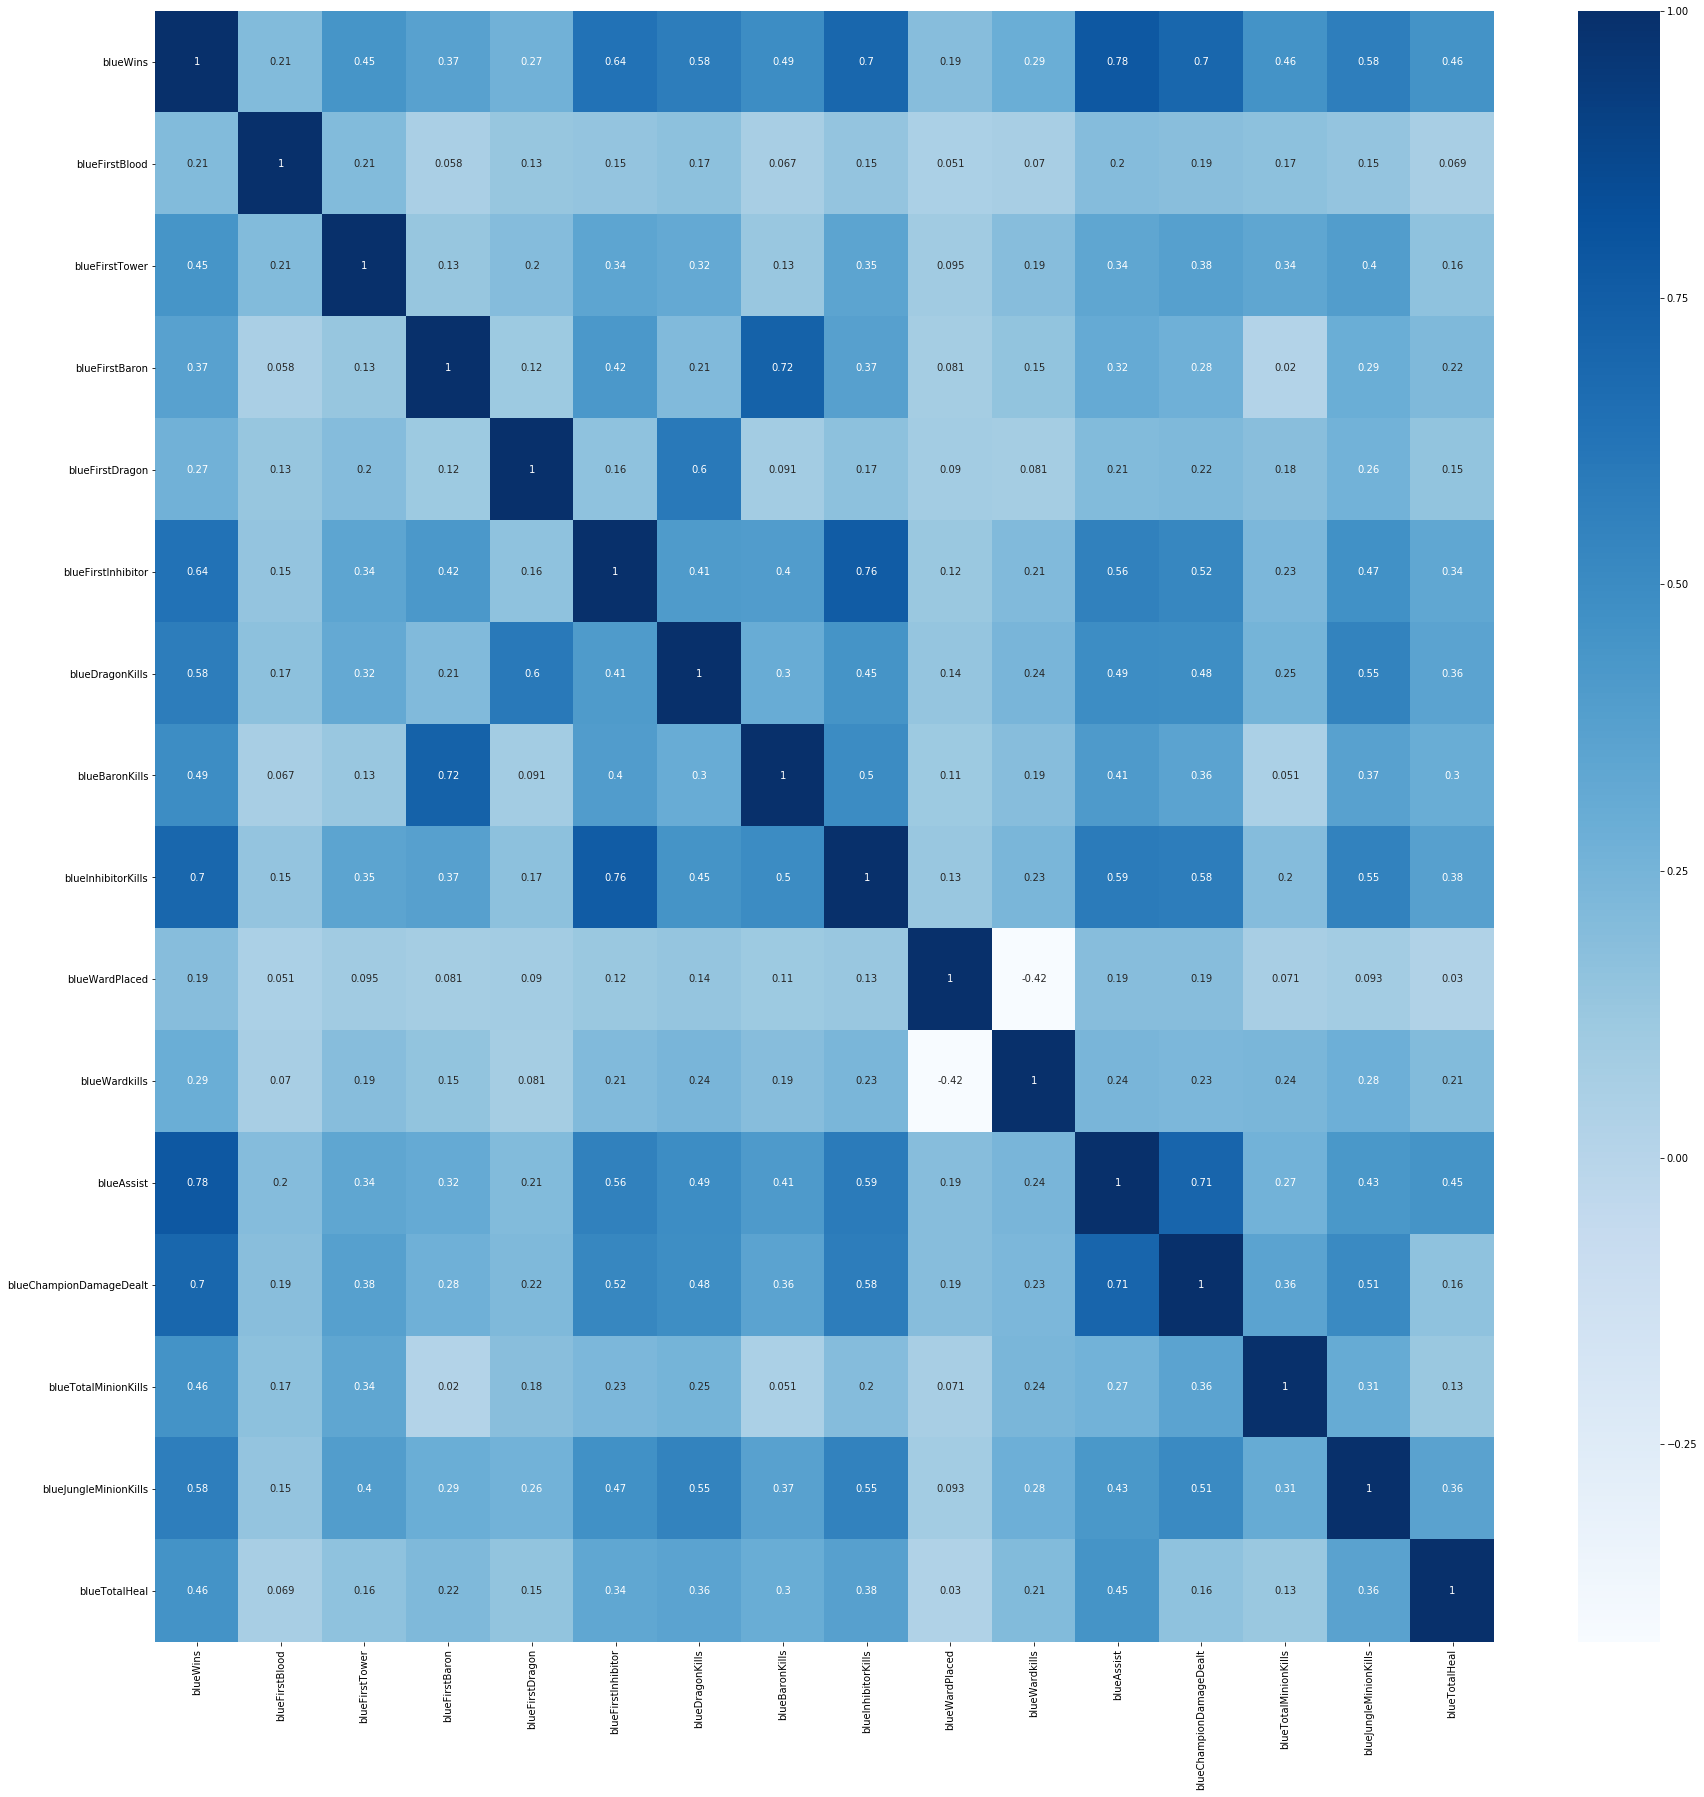

In [47]:
#Co-relation matrix re-revisited
plt.figure(figsize = (30,30))
sns.heatmap(data_set.corr(),annot = True,cmap = plt.cm.Blues)
plt.savefig('co2.png')
plt.show()

# Exploratory Data Analysis

In [48]:
data_set

,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueAssist,blueChampionDamageDealt,blueTotalMinionKills,blueJungleMinionKills,blueTotalHeal
0,0,1,0,0,0,0,-3,0,-1,-12,-4,-46,-16977,-93,-33,-7676
1,1,0,0,0,1,0,2,0,0,11,0,23,16025,-40,-23,1568
2,0,0,0,0,0,0,-2,0,-1,-12,-2,-12,-6783,-94,-25,-6022
3,0,0,0,1,1,0,-2,0,0,33,-17,-27,-24259,-58,21,-40594
4,1,1,1,1,1,1,-1,1,2,14,-8,-36,3290,37,25,-49270
5,1,1,1,0,0,1,1,0,1,7,5,9,-4403,21,31,17184
6,0,0,1,0,0,0,-4,-1,-1,0,-3,-29,-8154,-39,-78,-10912
7,1,1,1,1,0,1,0,1,2,3,11,58,40315,5,24,766
8,1,1,1,1,0,1,2,1,1,-7,24,10,7405,58,-15,-2300
9,1,0,1,0,1,0,1,0,0,-4,1,21,23653,25,23,-5881


In [49]:
#More inspections
win_stats = data_set.filter(like="blue").loc[data_set["blueWins"] == 1]
win_stats.describe()

,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueAssist,blueChampionDamageDealt,blueTotalMinionKills,blueJungleMinionKills,blueTotalHeal
count,13454.0,13454.000000,13454.000000,13454.000000,13454.000000,13454.000000,13454.000000,13454.000000,13454.000000,13454.000000,13454.000000,13454.000000,13454.000000,13454.000000,13454.000000,13454.000000
mean,1.0,0.606734,0.749814,0.401591,0.537833,0.674372,1.014717,0.374535,1.011298,2.567118,2.848521,20.415267,12889.511446,22.857514,27.489594,6209.307492
std,0.0,0.488493,0.433136,0.490238,0.498585,0.468626,1.682991,0.715323,0.998783,13.901788,8.013356,16.451716,12989.174984,56.526090,39.970615,12916.684112
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,-3.000000,-5.000000,-79.000000,-51.000000,-102.000000,-79666.000000,-355.000000,-178.000000,-94774.000000
25%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.000000,-1.000000,11.000000,5789.500000,-12.000000,0.000000,-389.500000
50%,1.0,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,2.000000,20.000000,12477.000000,21.000000,25.000000,5241.000000
75%,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,10.000000,7.000000,29.000000,20012.500000,58.000000,52.000000,12451.750000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,4.000000,9.000000,81.000000,51.000000,139.000000,91424.000000,277.000000,319.000000,102486.000000


In [50]:
lose_stats = data_set.filter(like="blue").loc[data_set["blueWins"] == 0]
lose_stats.describe()

,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueAssist,blueChampionDamageDealt,blueTotalMinionKills,blueJungleMinionKills,blueTotalHeal
count,13450.0,13450.000000,13450.000000,13450.000000,13450.000000,13450.000000,13450.000000,13450.000000,13450.000000,13450.000000,13450.000000,13450.000000,13450.000000,13450.000000,13450.000000,13450.000000
mean,0.0,0.400297,0.301338,0.086543,0.274796,0.059777,-1.363346,-0.433234,-0.941710,-2.951747,-2.013160,-20.049963,-12457.115019,-34.648253,-29.261561,-7121.023123
std,0.0,0.489977,0.458856,0.281174,0.446428,0.237082,1.673101,0.719720,0.996697,14.053951,7.972659,16.105054,13063.988869,54.459321,40.256376,12965.136978
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,-4.000000,-7.000000,-112.000000,-44.000000,-138.000000,-103795.000000,-275.000000,-296.000000,-157614.000000
25%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,-1.000000,-1.000000,-11.000000,-6.000000,-29.000000,-19413.000000,-69.000000,-54.000000,-13264.500000
50%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-2.000000,-1.000000,-19.000000,-12108.000000,-33.000000,-27.000000,-6094.000000
75%,0.0,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.000000,-11.000000,-5244.000000,0.000000,0.000000,-228.000000
max,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,4.000000,5.000000,137.000000,55.000000,98.000000,88567.000000,274.000000,181.000000,88465.000000


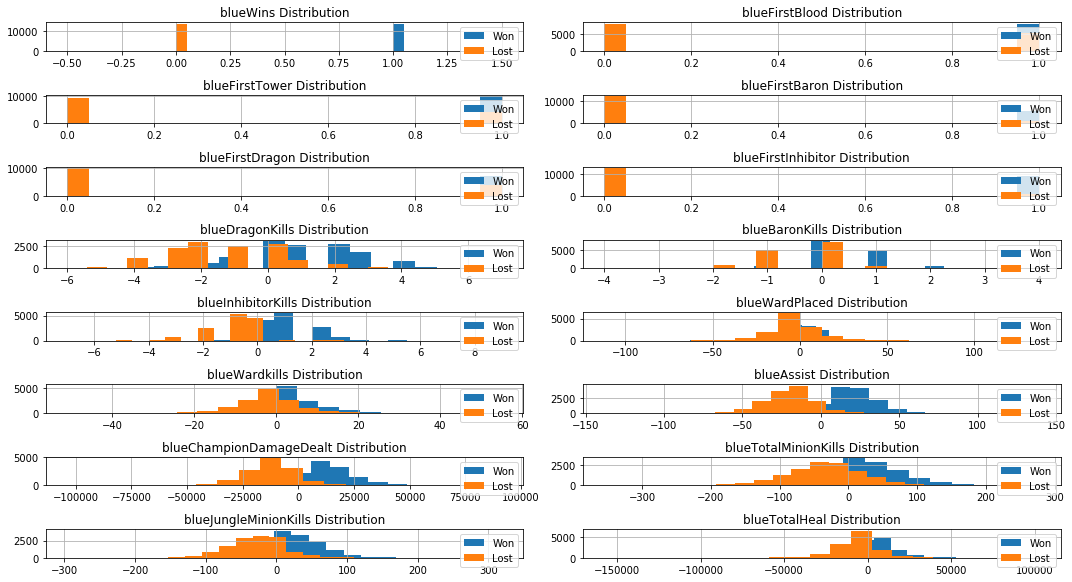

In [51]:
from matplotlib import pyplot
def compare_histograms(df1, df2, variables, n_rows, n_cols):
        fig=plt.figure(figsize=(15,15))
        for i, var_name in enumerate(variables):
            ax=fig.add_subplot(n_rows,n_cols,i+1)
            df1[var_name].hist(bins=20, ax=ax, label="Won") # for histogram
            df2[var_name].hist(bins=20, ax=ax, label="Lost") # for histogram
            ax.set_title(var_name+" Distribution")
            pyplot.legend(loc="upper right")
            plt.tight_layout()
        plt.show()



histogram_data_win = win_stats
histogram_data_lose = lose_stats
        
compare_histograms(histogram_data_win, histogram_data_lose, histogram_data_win, 15, 2)

# Data Preprocessing

In [52]:
y = data_set.iloc[:,0].values #win class
x = data_set.iloc[:,1:].values #other attributes seperated

In [53]:
#Preparing train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3,stratify=y)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [54]:
'''#Double Cross Validation in order to find optimal n_estimators and max_features that results with useful accuracy. 

from sklearn.model_selection import KFold
from sklearn import tree
import matplotlib.pyplot as plt

# manual nested cross-validation for random forest on a classification dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# enumerate splits
outer_results = list()
for train_ix, test_ix in cv_outer.split(x):
	# split data
	X_train, X_test = x[train_ix, :], x[test_ix, :]
	y_train, y_test = y[train_ix], y[test_ix]
	# configure the cross-validation procedure
	cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
	# define the model
	model = RandomForestClassifier(random_state=1)
	# define search space
	space = dict()
	space['n_estimators'] = [10, 200, 1000]
	space['max_features'] = [4, 6, 10]
	# define search
	search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True)
	# execute search
	result = search.fit(X_train, y_train)
	# get the best performing model fit on the whole training set
	best_model = result.best_estimator_
	# evaluate model on the hold out dataset
	yhat = best_model.predict(X_test)
	# evaluate the model
	acc = accuracy_score(y_test, yhat)
	# store the result
	outer_results.append(acc)
	# report progress
	print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))'''

"#Double Cross Validation in order to find optimal n_estimators and max_features that results with useful accuracy. \n\nfrom sklearn.model_selection import KFold\nfrom sklearn import tree\nimport matplotlib.pyplot as plt\n\n# manual nested cross-validation for random forest on a classification dataset\nfrom numpy import mean\nfrom numpy import std\nfrom sklearn.datasets import make_classification\nfrom sklearn.model_selection import KFold\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.metrics import accuracy_score\n\n# configure the cross-validation procedure\ncv_outer = KFold(n_splits=10, shuffle=True, random_state=1)\n# enumerate splits\nouter_results = list()\nfor train_ix, test_ix in cv_outer.split(x):\n\t# split data\n\tX_train, X_test = x[train_ix, :], x[test_ix, :]\n\ty_train, y_test = y[train_ix], y[test_ix]\n\t# configure the cross-validation procedure\n\tcv_inner = KFold(n_splits=3, shuffle=True, random_sta

# Modal Selection - XGboost Classifier

In [55]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

classifier = XGBClassifier(n_estimators = 100,learning_rate = 0.3)
classifier.fit(x_train,y_train, eval_set=[(x_train,y_train),(x_test,y_test)])
y_pred = classifier.predict(x_test)

[0]	validation_0-error:0.02241	validation_1-error:0.03159
[1]	validation_0-error:0.02076	validation_1-error:0.02949
[2]	validation_0-error:0.01779	validation_1-error:0.02639
[3]	validation_0-error:0.01784	validation_1-error:0.02614
[4]	validation_0-error:0.01667	validation_1-error:0.02589
[5]	validation_0-error:0.01551	validation_1-error:0.02453
[6]	validation_0-error:0.01508	validation_1-error:0.02329
[7]	validation_0-error:0.01386	validation_1-error:0.02267
[8]	validation_0-error:0.01312	validation_1-error:0.02218
[9]	validation_0-error:0.01232	validation_1-error:0.02168
[10]	validation_0-error:0.01136	validation_1-error:0.02180
[11]	validation_0-error:0.01104	validation_1-error:0.02131
[12]	validation_0-error:0.01089	validation_1-error:0.02205
[13]	validation_0-error:0.01025	validation_1-error:0.02118
[14]	validation_0-error:0.00977	validation_1-error:0.02094
[15]	validation_0-error:0.00887	validation_1-error:0.02056
[16]	validation_0-error:0.00855	validation_1-error:0.02032
[17]	va

# Metrics #1-1

In [56]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(cm,"\n accuracy:",accuracy)

[[3954   81]
 [  77 3960]] 
 accuracy: 0.9804261645193261


# Modal Selection - Decision Tree Classifier

In [57]:
from sklearn import tree
import matplotlib.pyplot as plt

clf = tree.DecisionTreeClassifier(criterion = "gini", min_samples_split=1000,max_features=4)
clf = clf.fit(x_train,y_train)
y_pred2 = clf.predict(x_test)

# Metrics #1-2

In [58]:
cm2 = confusion_matrix(y_test, y_pred2)
accuracy2 = accuracy_score(y_test, y_pred2)
print(cm2,"\n accuracy:",accuracy2)

[[3833  202]
 [ 134 3903]] 
 accuracy: 0.958374628344896


# Visualization of XGB Tree and Decision Tree 1

In [59]:
#XGB Tree as .png saved
import xgboost as xgb

format = 'png' #You should try the 'svg'

image = xgb.to_graphviz(classifier)

#Set a different dpi (work only if format == 'png')
image.graph_attr = {'dpi':'400'}

image.render('updated-Challenger-XGB-1', format = format)

'updated-Challenger-XGB-1.png'

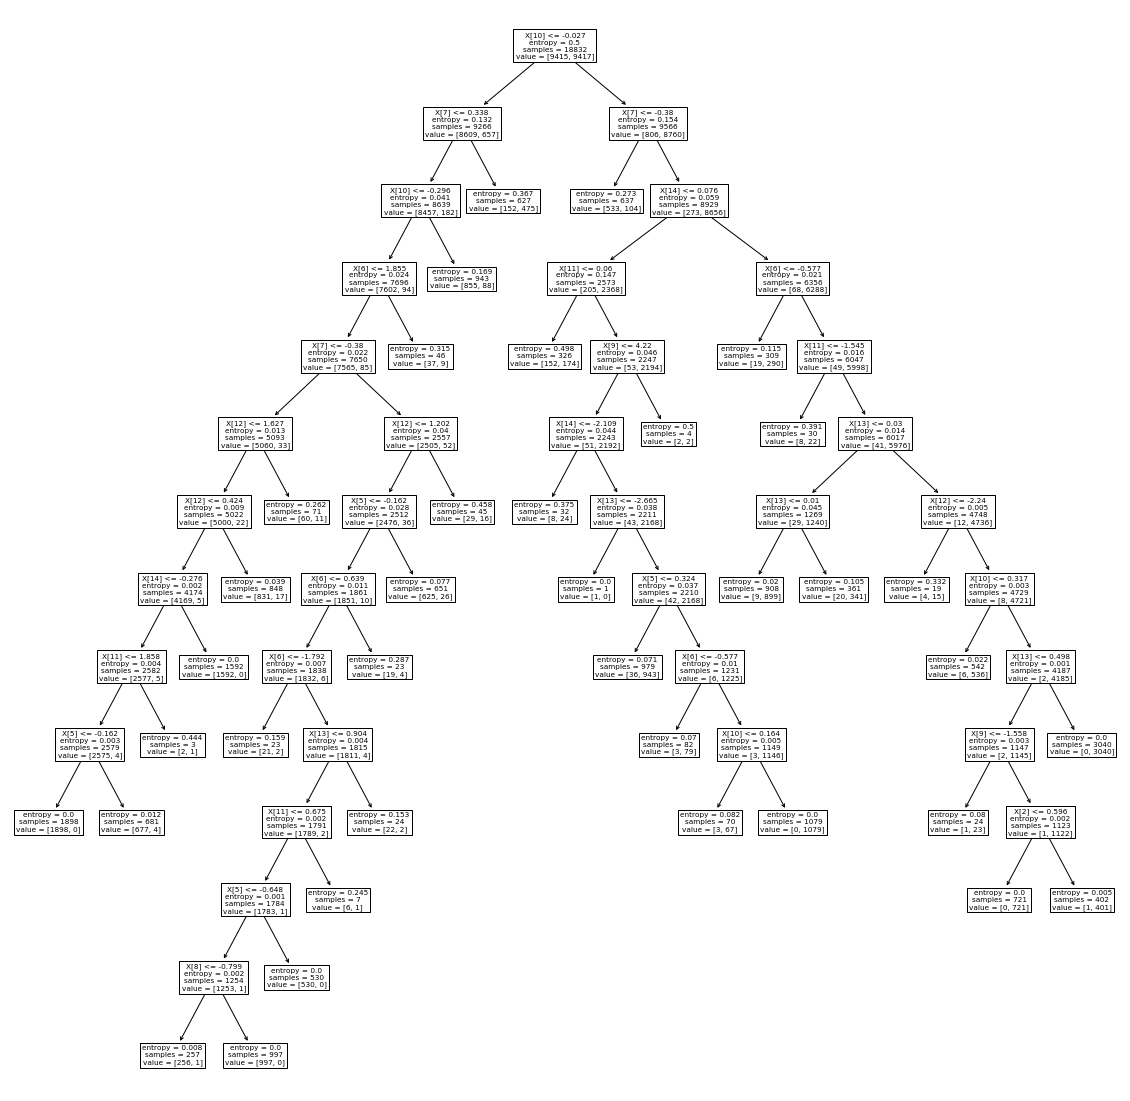

'updated-Challenger-Decision-1.png'

In [60]:
#Decision Tree as you can see down below and saved as .png
tree_plot = plt.figure(figsize=(20,20))
tree.plot_tree(clf)
plt.show()

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import pandas as pd
import graphviz

dot_data = export_graphviz(clf, out_file=None,filled=True, rounded=True, special_characters=True ,class_names=['0','1'])
graph = graphviz.Source(dot_data)

graph.render(filename="updated-Challenger-Decision-1", format="png")

# Dimensionality Reduction and Reduction of Overfitting by PCA

In [61]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
reduction = pca.fit_transform(x_train)
reduction_test = pca.transform(x_test)
print(pca.explained_variance_ratio_)

[0.34728518]


In [62]:
data_reduced = pd.DataFrame(data = reduction,columns = ['pc1'])
data_reduced

,pc1
0,1.995674
1,1.845702
2,-1.303314
3,-3.408987
4,-2.283459
5,-1.888745
6,-1.725809
7,2.315605
8,-1.635017
9,2.902548


In [63]:
reduction_test

array([[-3.0818945 ],
       [ 2.21200305],
       [-1.80947143],
       ...,
       [ 2.66721268],
       [ 0.2910547 ],
       [ 3.60866427]])

In [64]:
#Preparing PC1 to put in XGB again
x_reduced = data_reduced.iloc[:,:].values

# PCA XGB Tree

In [65]:
#Fitting XGB Classifier
from xgboost import XGBClassifier
reduced_class = XGBClassifier(n_estimators = 100,learning_rate = 0.1)
reduced_class.fit(x_reduced,y_train)
y_reduced_pred = reduced_class.predict(reduction_test)

# Metrics #2-1

In [66]:
from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(y_test, y_reduced_pred)
accuracy = accuracy_score(y_test, y_reduced_pred)
print(cm,"\n accuracy:",accuracy)

[[3820  215]
 [ 187 3850]] 
 accuracy: 0.9501982160555005


# PCA Decision Tree

In [67]:
#Fitting Decision Tree Classifier
clf2 = tree.DecisionTreeClassifier(criterion = "gini", min_samples_split=1000)
clf2 = clf2.fit(x_reduced,y_train)
y_reduced_pred2 = clf2.predict(reduction_test)

# Metrics #2-2

In [68]:
cm2 = confusion_matrix(y_test, y_reduced_pred2)
accuracy2 = accuracy_score(y_test, y_reduced_pred2)
print(cm2,"\n accuracy:",accuracy2)

[[3827  208]
 [ 192 3845]] 
 accuracy: 0.9504459861248761


# Visualization of XGB Tree and Decision Tree 2

In [69]:
#XGB Tree as .png saved
import xgboost as xgb

format = 'png' #You should try the 'svg'

image = xgb.to_graphviz(reduced_class)

#Set a different dpi (work only if format == 'png')
image.graph_attr = {'dpi':'400'}

image.render('updated-Challenger-XGB-2', format = format)

'updated-Challenger-XGB-2.png'

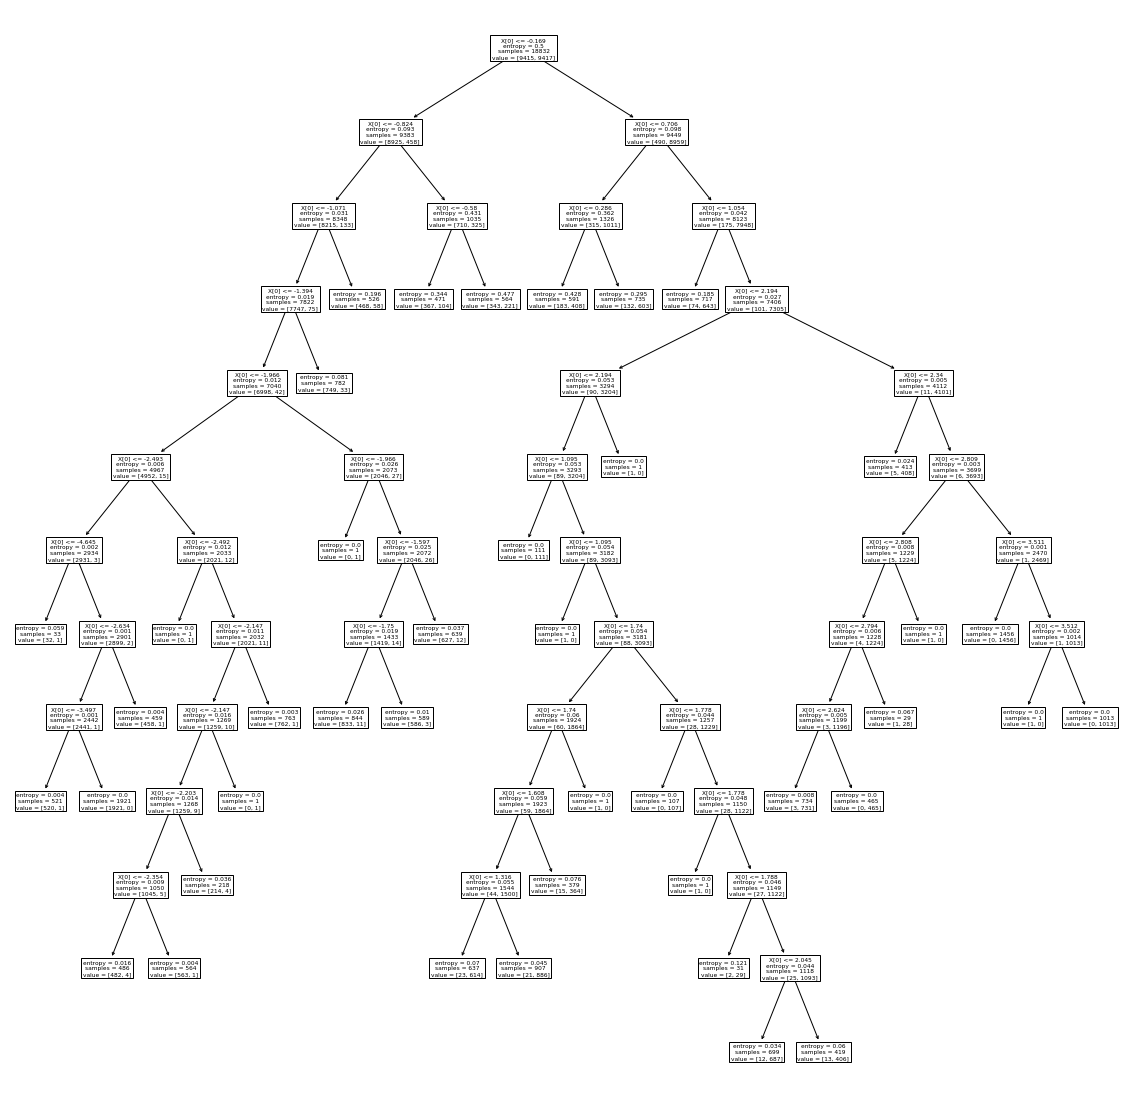

'updated-Challenger-Decision-2.png'

In [70]:
#Decision Tree as you can see down below and saved as .png
tree_plot = plt.figure(figsize=(20,20))
tree.plot_tree(clf2)
plt.show()

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import pandas as pd
import graphviz

dot_data = export_graphviz(clf2, out_file=None,filled=True, rounded=True, special_characters=True ,class_names=['0','1'])
graph = graphviz.Source(dot_data)

graph.render(filename="updated-Challenger-Decision-2", format="png")